# Probabilistic Computing
---

The field of probabilistic computing, where the concept of randomness is harnessed to enhance certain computations, is currently experiencing a resurgence driven by the explosion of machine learning and AI algorithms that exploit these effects. However, in the context of classical circuits, randomness is almost always associated with the unwanted effects from noise. Bits stored in magnetic drives can randomly flip when exposed to certain magnetic fields, a **NOT** gate could mistakenly invert its output if there's a glitch in its power supply, and every so often, a cosmic ray particle can cause enough charge accumulation to modify values in memory. 

Therefore, a natural way to introduce the concept of randomness into digital logic is by "upgrading" the well-defined (deterministic) binary vector $|b\rangle$ we introduced in the previous chapter, into a probability vector $|p\rangle$, where its components represent the probability of measuring a $0$ or a $1$. This vector will then correspond a representation of a probabilistic bit, or p-bit for short.

## 1. Single-Bit Probabilistic Systems

### 1.1 Probabilistic Single-Bit States (p-bits)

Let us start by considering the case of a noisy **NOT** gate that, whenever its input is a $0$, the output is either $0$ with probability of a quarter, or a $1$ with probability of three quarters. Physically, this model could describe a poorly-designed connection in a circuit where a clock signal gets coupled every so often changing the behavior of the gate. We could represent the output state of uncertainty of this gate with a column vector where the top element is the probability of the output being $0$, and the bottom element the probability of measuring a $1$:

$$ \vec{p} = \begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix} .$$ 

More generally, a probability vector can be expressed as:

$$ \vec{p} = \begin{bmatrix} \rho_{0} \\ \rho_{1} \end{bmatrix} ,$$

where $\rho_{0}$ and $\rho_{1}$ represent the probabilities associated with the state being $0$ or $1$, respectively. Like all probabilities, these vector elements must meet the condition of being bounded between $0$ and $1$ ($\rho_{0}, \rho_{1} \in [0,1]$), and summing up to $1$ ($\rho_{0} + \rho_{1} = 1$).

Now, recall from the previous chapter that the magnitude of a real-valued vector is given by its Euclidean norm:

$$ \|\vec{p}\| = \sqrt{\rho_{0}^2 + \rho_{1}^2} .$$

And because probabilities must always add up to $1$, the length of our vector will actually changes depending on the values of $\rho_{0}$ and $\rho_{1}$. For example, for $\vec{p} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, we get $\|\vec{p}\| = 1$. On the other hand, if $\vec{p} = \begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix}$, then $\|\vec{p}\| \approx 0.79$. The dotted line in the figure below shows how the magnitude of the probability vector changes for different probability values:

<img src="images\01_04_01_prob_vec_length.png" align = "center" width="200"/>

Although this is the traditional way of defining a [probability vector](https://en.wikipedia.org/wiki/Probability_vector), it would be nice if we could simply tie the fact that probabilities must add to $1$ with having the length of our vector also be always equal to $1$. We can easily accomplish this if we define our vector elements such that their value **squared** correspond to the probabilities of interest. In other words, let us redefine our vector as:

$$ |p\rangle = \begin{bmatrix} \varrho_{0} \\ \varrho_{1} \end{bmatrix} ,$$

where the vector elements $\varrho_{0}, \varrho_{1} \in [0,1]$ satisfy the condition $ \varrho_{0}^2 + \varrho_{1}^2 = 1$ rather than directly summing up to $1$. This way, it is guaranteed we will always have $\|p\| = \sqrt{\varrho_{0}^2 + \varrho_{1}^2} = 1$. Graphically, we now have a vector whose amplitude lies on a circular section of radius $1$:

<img src="images\01_04_02_prob_amps_vec_length.png" align = "center" width="200"/>

Here, we have also relabeled our vector to use ket notation to make the distinction that $|p\rangle$ is always of length $1$, but just as we mentioned in the previous chapter, for the moment this is just a preference in notation. Using this new nomenclature, the probability vector that describes the example given at the beginning of this section will instead be given by:

$$ |p\rangle = \begin{bmatrix} \sqrt{\frac{1}{4}} \\ \sqrt{\frac{3}{4}} \end{bmatrix} .$$ 

At first glance, this seems to be a very impractical change. Now we need to square our vector elements to get probabilities, which at the end, are the numbers we really care about. But what's comforting about taking this step is that, this type of vector is a subset of those that describe quantum states. The main difference is that, in the case of p-bits (described by probability vectors), their components can only take values between $0$ and $1$, whereas for qubits (described by quantum vectors), we will allow their components to be complex-valued. These vector components are usually referred as probability amplitudes (or just amplitudes), so we will start using this terminology moving forward. Furthermore, the reason behind why qubits must be complex-valued will be described in the next chapter.

Another way to express our p-bit vector is as a linear combination of the unit vectors $|0\rangle$ and $|1\rangle$ scaled by the respective probability amplitudes:

$$
\begin{aligned}
\vec{p} &= \varrho_0 |0\rangle + \varrho_1 |1\rangle
\\
\\
\vec{p} &= \varrho_0 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \varrho_1 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{aligned}
$$

This representation shows that, if we want to a mathematical expression to extract the amplitude $\varrho_0$ (or $\varrho_1$) from the probability vector, we could perform the [dot product](https://en.wikipedia.org/wiki/Dot_product) between $|p\rangle$ and $|0\rangle$ (or $|1\rangle$). Recall that the dot product is a measure of the overlap between two vectors, and since $|0\rangle$ and $|1\rangle$ are orthogonal, the overlap between the two of them is always $0$:

$$ 
\begin{aligned}
\langle 0 | p \rangle &= \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} \varrho_0 \\ \varrho_1 \end{bmatrix}
\\
\\
\langle 0 | p \rangle &= 1 \times \varrho_0 + 0 \times \varrho_1
\\
\\
\langle 0 | p \rangle &= \varrho_0
\end{aligned}
$$

And the same can be shown for $|1\rangle$. Therefore, we define the probabilities of a p-bit being in states $0$ and $1$ as:

$$ 
\begin{aligned}
\text{P}_0 &= \langle 0 | p \rangle^2 = \varrho_0^2
\\
\\
\text{P}_1 &= \langle 1 | p \rangle^2 = \varrho_1^2 .
\end{aligned}
$$

From a practical standpoint, a probability vector encodes information about how likely it is to **measure** a $0$ or a $1$ for a given p-bit. Going back to the example of our noisy gate, a measurement could consist of, for example, connecting the output of the gate to a register that stores its value every clock cycle. The register's history will then look something like this:

$$ \{1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, \dots \} $$

where for a large number of measurements:

$$
\begin{aligned}
\frac{\text{# of 0s}}{\text{# of measurements}} &\approx P_0 = \frac{1}{4}
\\
\\
\frac{\text{# of 1s}}{\text{# of measurements}} &\approx P_1 = \frac{3}{4}
\end{aligned}
$$

Let's take a look at how to simulate something like this in Python. We will define a probability vector, and sample $0$ or $1$ using its probability amplitudes. We will use [Matplotlib](https://matplotlib.org/) to plot the results.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
# Define |p⟩
P0, P1 = (1/4, 3/4)
ket_p = np.array([[np.sqrt(P0)],
                  [np.sqrt(P1)]])
sp.Matrix(ket_p)

Matrix([
[              0.5],
[0.866025403784439]])

In [3]:
n_samps = 200                   # number of samples
vals = [0, 1]                   # Possible outcomes: 0 or 1
probs = (ket_p**2).reshape(-1)  # Square |p⟩ and flatten to 1D array with probabilities for 0 and 1

# sample 0 or 1 a 100 times using probabilities from |p⟩
samples = np.random.choice(vals, size=n_samps, p=probs)
print(samples)

[1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1
 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0]


In [4]:
# Calculate frequency of outcomes
freq_0 = np.count_nonzero(samples == 0)/n_samps
freq_1 = np.count_nonzero(samples == 1)/n_samps

print(f'For P0 = {P0} and {n_samps} samples, the frequency of 0s is {freq_0}')
print(f'For P1 = {P1} and {n_samps} samples, the frequency of 1s is {freq_1}')

For P0 = 0.25 and 200 samples, the frequency of 0s is 0.215
For P1 = 0.75 and 200 samples, the frequency of 1s is 0.785


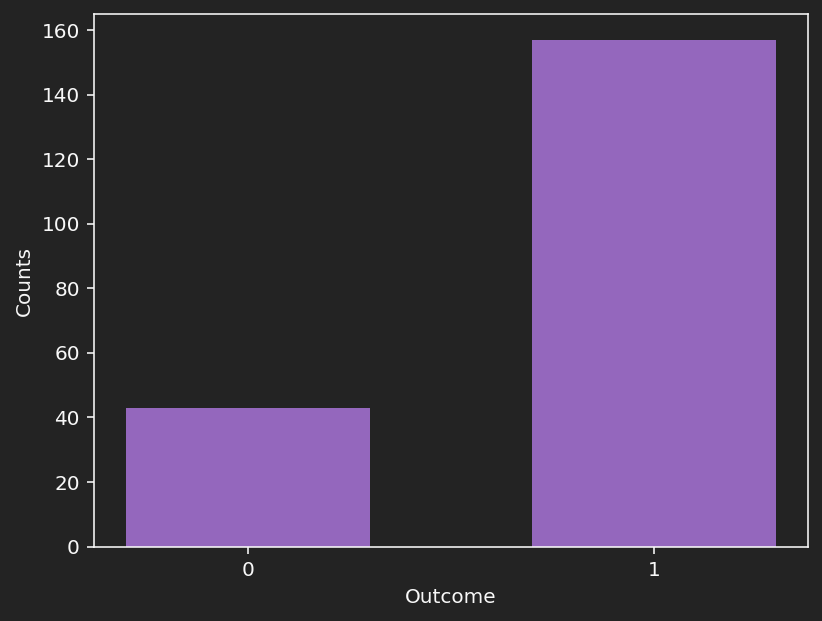

In [5]:
plt.hist(samples, bins=[-0.3, 0.3, 0.7, 1.3], color='tab:purple')
plt.xticks([0,1])
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

### 1.2 Probabilistic Single-Bit Gates

Let's reconsider the noisy **NOT** gate for which an input of $0$ results in an output of $0$ with probability $1/4$, and an output of $1$ with probability $3/4$. Now, let's assume that when the input to this gate is $1$, the gate behaves just as expected. This means that its output is $0$ with probability of $1$, and $1$ with probability $0$. We can then construct a stochastic matrix $Q$ for this gate by looking at the input to output mapping:

$$
\begin{aligned}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} &\xrightarrow{\; \; Q \; \;} \begin{bmatrix} \sqrt{\frac{1}{4}} \\ \sqrt{\frac{3}{4}} \end{bmatrix}
\\
\\
\begin{bmatrix} 0 \\ 1 \end{bmatrix} &\xrightarrow{\; \; Q \; \;} \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\end{aligned}
$$

Allowing $Q$ to be a general matrix with elements $q_{ij}$, we can write the first of these relations as:

$$
\begin{aligned}
\begin{bmatrix} \sqrt{\frac{1}{4}} \\ \sqrt{\frac{3}{4}} \end{bmatrix} &= 
\begin{bmatrix} q_{00} & q_{01} \\ q_{10} & q_{11} \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\\
\\
\begin{bmatrix} \sqrt{\frac{1}{4}} \\ \sqrt{\frac{3}{4}} \end{bmatrix} &= \begin{bmatrix} q_{00} \\ q_{10} \end{bmatrix},
\end{aligned}
$$

which implies $q_{00} = \sqrt{\frac{1}{4}}$ and $q_{10} = \sqrt{\frac{3}{4}}$. Similarly, for the second relation:

$$
\begin{aligned}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} &= 
\begin{bmatrix} q_{00} & q_{01} \\ q_{10} & q_{11} \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\\
\begin{bmatrix} 1 \\ 0 \end{bmatrix} &= \begin{bmatrix} q_{01} \\ q_{11} \end{bmatrix},
\end{aligned}
$$

resulting in $q_{01} = 1$ and $q_{11} = 0$. We can then put together the matrix:

$$ Q = \begin{bmatrix} \sqrt{\frac{1}{4}} & 1 \\ \sqrt{\frac{3}{4}} & 0 \end{bmatrix} $$

The most important thing to note about stochastic matrices is that their corresponding inverse matrix $Q^{-1}$ is not physically implementable. This means that stochastic matrices are not associated with reversible gates like the ones we presented in previous chapters deterministic circuits. Intuitively, this makes sense since probabilities are a measure of uncertainty; therefore, it doesn't make sense to think that the effect of a gate that introduces randomness could be "canceled out" by some other probabilistic gate. Let us, for example, look at the inverse matrix of the example above:

$$
\begin{aligned}
Q^{-1} &= \frac{1}{q_{00}q_{11} - q_{01}q_{10}} \begin{bmatrix} \phantom{-}q_{11} & -q_{01} \\ -q_{10} & \phantom{-}q_{00} \end{bmatrix}
\\
\\
Q^{-1} &= \frac{1}{\sqrt{\frac{1}{4}} \times 0 - 1 \times \sqrt{\frac{3}{4}}} \begin{bmatrix} \phantom{-}0 & -1 \\ -\sqrt{\frac{3}{4}} & \phantom{-}\sqrt{\frac{1}{4}} \end{bmatrix}
\\
\\
Q^{-1} &= \begin{bmatrix} 0 & \phantom{-}\sqrt{\frac{4}{3}} \\ 1 & -\sqrt{\frac{1}{3}} \end{bmatrix}
\end{aligned}
$$

The issue with $Q^{-1}$ is that its entries must be positive square roots of probabilities, which $ -\sqrt{\frac{1}{3}}$ clearly is not. Furthermore, even if we allowed for negative entries, the sum of the squares of the column entries must add to $1$, which also wouldn't the case for the second column.

In [6]:
import numpy as np
import sympy as sp

# Define the matrix
matrix = np.array([[1/4, 1],
                   [3/4, 0]])

# Compute the inverse
inverse_matrix = np.linalg.inv(matrix)

print(inverse_matrix)

[[ 0.          1.33333333]
 [ 1.         -0.33333333]]


In [7]:
q00, q01, q10, q11 = sp.symbols('q00, q01, q10, q11')

Q = sp.Matrix([[q00, q01],[q10, q11]])
Q

Matrix([
[q00, q01],
[q10, q11]])

In [8]:
Q.inv()

Matrix([
[ q11/(q00*q11 - q01*q10), -q01/(q00*q11 - q01*q10)],
[-q10/(q00*q11 - q01*q10),  q00/(q00*q11 - q01*q10)]])

In [9]:
a = matrix @ np.array([[1],[0]])
a

array([[0.25],
       [0.75]])

In [10]:
np.sum(a)

1.0

In [11]:
b = matrix @ a
b

array([[0.8125],
       [0.1875]])

In [12]:
np.sum(b)

1.0

In [13]:
c = matrix @ b
c

array([[0.390625],
       [0.609375]])

In [14]:
np.sum(c)

1.0

In [15]:
d = matrix @ c
d

array([[0.70703125],
       [0.29296875]])

In [16]:
e = matrix @ d
e

array([[0.46972656],
       [0.53027344]])

In [17]:
f = matrix @ e
f

array([[0.64770508],
       [0.35229492]])

In [18]:
g = matrix @ f
g

array([[0.51422119],
       [0.48577881]])

In [ ]:
g = matrix @ f
g

In [19]:
sum(g)

array([1.])